# Model Building

### Importing required packages

In [6]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import numpy as np 
warnings.filterwarnings('ignore')

### Reading DataSet

In [7]:
df = pd.read_csv("Final DataFrame.csv")

In [8]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Inflation/CPI', 'UNRATE', 'FEDFUNDS',
       'CCI', 'Market_Cap_to_GDP', 'Avg T10Y3M', 'Housing Price',
       'Debt_to_GDP', 'Manufacturing Output', 'M2V', 'Recession_US'],
      dtype='object')

In [9]:
df_model = df[['Inflation/CPI', 'UNRATE', 'FEDFUNDS',
       'CCI', 'Market_Cap_to_GDP', 'Avg T10Y3M', 'Housing Price',
       'Debt_to_GDP', 'Manufacturing Output', 'M2V', 'Recession_US']]

In [10]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [11]:
df_dum

,Inflation/CPI,UNRATE,FEDFUNDS,CCI,Market_Cap_to_GDP,Avg T10Y3M,Housing Price,Debt_to_GDP,Manufacturing Output,M2V,Recession_US
0,94.400,8.6,13.22,97.50,0.184275,1.676000,106.20,32.41298,91.302757,1.842,0
1,94.700,8.9,14.78,97.41,0.184275,0.131500,106.20,32.41298,91.302757,1.842,0
2,94.700,9.0,14.68,97.27,0.184275,0.546522,106.20,32.41298,91.302757,1.842,0
3,95.000,9.3,14.94,97.31,0.182363,0.503182,108.84,32.40213,91.302757,1.836,0
4,95.900,9.4,14.45,97.38,0.182363,0.865238,108.84,32.40213,91.302757,1.836,0
...,...,...,...,...,...,...,...,...,...,...,...
480,281.933,4.0,0.08,97.46,2.371155,1.541429,578.58,122.87943,102.768000,1.140,0
481,284.182,3.8,0.08,97.13,2.371155,1.538500,578.58,122.87943,102.768000,1.140,0
482,287.708,3.6,0.20,96.91,2.371155,1.680435,578.58,122.87943,102.768000,1.140,0
483,288.663,3.6,0.33,96.84,2.371155,1.889524,617.89,121.07100,103.670000,1.167,0


### Splitting Data for Test and Training

In [12]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_dum.drop('Recession_US', axis =1)
Y = df_dum.Recession_US.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Using GridSearchCV
finding the best suited classification model using GridSearchCV

### Import necessary packages

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Initialze the estimators

In [14]:
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = GradientBoostingClassifier(random_state=42)


### Initiaze the hyperparameters for Random Forest

In [15]:
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

In [16]:
# creating Pipeline
pipeline = Pipeline([('classifier', clf1)])
params = [param1]

In [17]:
# finding best parameters and fitting that model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train, y_train)

In [18]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'classifier': RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=10,
                        random_state=42),
 'classifier__class_weight': {0: 1, 1: 10},
 'classifier__max_depth': 10,
 'classifier__n_estimators': 100}

In [19]:
# the mean cross-validated score of the best_estimator
gs.best_score_

0.9942402230537825

In [20]:
# Test data performance
from sklearn.metrics import *
print("Test Precision:",precision_score(gs.predict(x_test), y_test))
print("Test Recall:",recall_score(gs.predict(x_test), y_test))
print("Test F1 Score:",f1_score(gs.predict(x_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(x_test), y_test))

Test Precision: 0.8571428571428571
Test Recall: 0.8571428571428571
Test F1 Score: 0.8571428571428571
Test ROC AUC Score: 0.9230158730158731


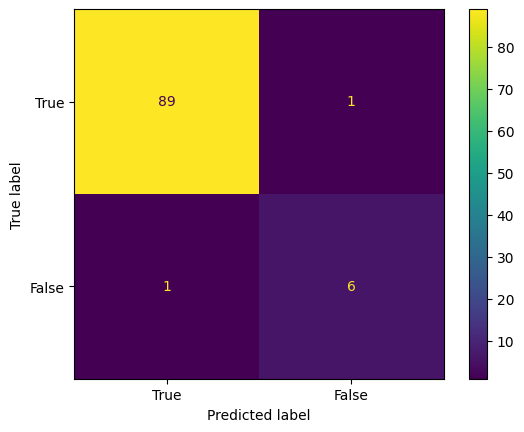

In [21]:
# Confusion Matrix
confusion_matrix1 = metrics.confusion_matrix(y_test,gs.predict(x_test))

cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [True,False])

cm_display1.plot()
plt.show()

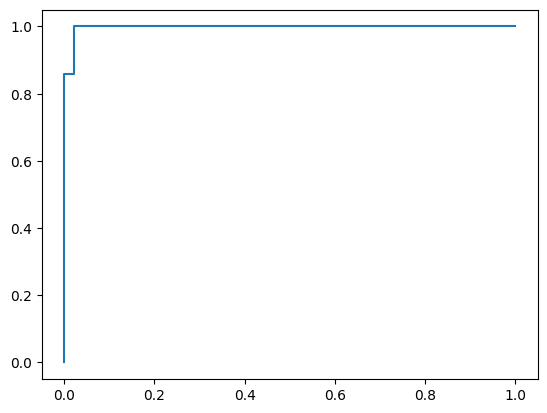

In [22]:
# roc-auc curve
y_predict_probab1 = gs.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr,thresholds=roc_curve(y_test,y_predict_probab1)

## plot roc curve
plt.plot(fpr,tpr)

# SVM
- Parameter tuning, and
- model Building

#### Initiaze the hyperparameters for SVM

In [23]:
param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

In [24]:
pipeline2 = Pipeline([('classifier', clf2)])
params2 = [param2]

In [25]:
gs2 = GridSearchCV(pipeline2, params2, cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train, y_train)

In [26]:
# Best performing model and its corresponding hyperparameters
gs2.best_params_

{'classifier': SVC(C=100, class_weight={0: 1, 1: 25}, probability=True, random_state=42),
 'classifier__C': 100,
 'classifier__class_weight': {0: 1, 1: 25}}

In [27]:
# the mean cross-validated score of the best_estimator
gs2.best_score_

0.9717017777835325

In [28]:
# Test data performance
print("Test Precision:",precision_score(gs2.predict(x_test), y_test))
print("Test Recall:",recall_score(gs2.predict(x_test), y_test))
print("Test F1 Score:",f1_score(gs2.predict(x_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs2.predict(x_test), y_test))

Test Precision: 1.0
Test Recall: 0.3684210526315789
Test F1 Score: 0.5384615384615384
Test ROC AUC Score: 0.6842105263157895


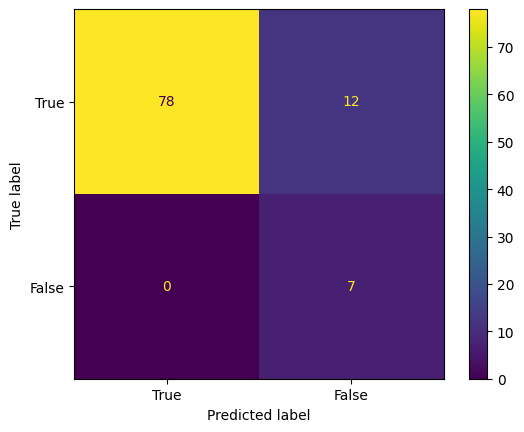

In [29]:
# Confusion Matrix
confusion_matrix2 = metrics.confusion_matrix(y_test,gs2.predict(x_test))

cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [True,False])

cm_display2.plot()
plt.show()

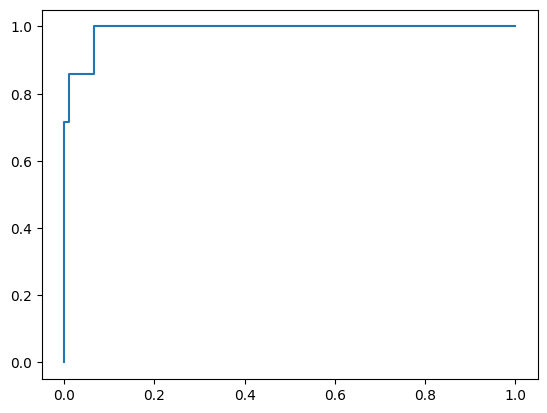

In [30]:
# roc-auc curve
y_predict_probab2 = gs2.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr,thresholds=roc_curve(y_test,y_predict_probab2)

## plot roc curve
plt.plot(fpr,tpr)

### Logistic Regression
- Finding best Hyperparameter for Logstic Regression
- And, Training the model

#### Initiaze the hyperparameters for Logistic Regression

In [31]:
param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

In [32]:
pipeline3 = Pipeline([('classifier', clf3)])
params3 = [param3]

In [33]:
gs3 = GridSearchCV(pipeline3, params3, cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train, y_train)

In [34]:
# Best performing model and its corresponding hyperparameters
gs3.best_params_

{'classifier': LogisticRegression(C=100, class_weight={0: 1, 1: 25}, random_state=42),
 'classifier__C': 100,
 'classifier__class_weight': {0: 1, 1: 25},
 'classifier__penalty': 'l2'}

In [35]:
gs3.best_score_

0.9478987280582496

In [36]:
# Test data performance
print("Test Precision:",precision_score(gs3.predict(x_test), y_test))
print("Test Recall:",recall_score(gs3.predict(x_test), y_test))
print("Test F1 Score:",f1_score(gs3.predict(x_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs3.predict(x_test), y_test))

Test Precision: 1.0
Test Recall: 0.3684210526315789
Test F1 Score: 0.5384615384615384
Test ROC AUC Score: 0.6842105263157895


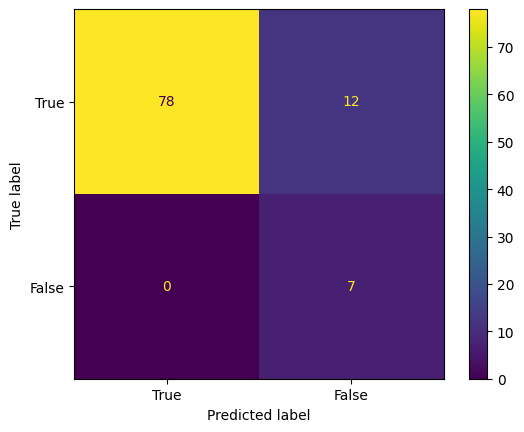

In [37]:
# Confusion Matrix
confusion_matrix3 = metrics.confusion_matrix(y_test,gs3.predict(x_test))

cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [True,False])

cm_display3.plot()
plt.show()

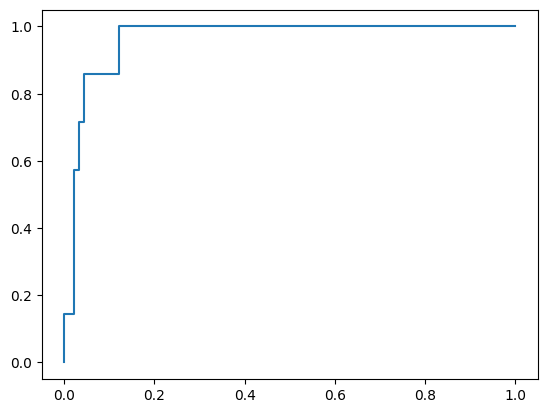

In [38]:
# roc-auc curve
y_predict_probab3 = gs3.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr,thresholds=roc_curve(y_test,y_predict_probab3)

## plot roc curve
plt.plot(fpr,tpr)

### Gradient Boost

#### Initiaze the hyperparameters for Random Forest

In [39]:
param4 = {}
param4['classifier__n_estimators'] = [10, 50, 100, 250]
param4['classifier__max_depth'] = [5, 10, 20]
param4['classifier'] = [clf4]

In [40]:
pipeline4 = Pipeline([('classifier', clf4)])
params4 = [param4]

In [41]:
gs4 = GridSearchCV(pipeline4, params4, cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train, y_train)

In [42]:
# Best performing model and its corresponding hyperparameters
gs4.best_params_


{'classifier': GradientBoostingClassifier(max_depth=5, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100}

In [43]:
gs4.best_score_

0.9431467502255139

In [44]:
# Test data performance
print("Test Precision:",precision_score(gs4.predict(x_test), y_test))
print("Test Recall:",recall_score(gs4.predict(x_test), y_test))
print("Test F1 Score:",f1_score(gs4.predict(x_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs4.predict(x_test), y_test))


Test Precision: 0.8571428571428571
Test Recall: 0.8571428571428571
Test F1 Score: 0.8571428571428571
Test ROC AUC Score: 0.9230158730158731


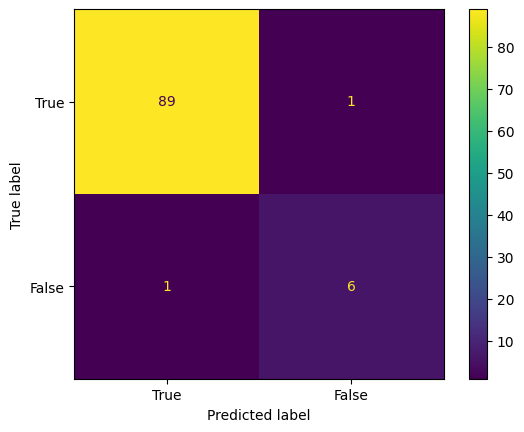

In [45]:
# Confusion Matrix
confusion_matrix4 = metrics.confusion_matrix(y_test,gs4.predict(x_test))

cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = [True,False])

cm_display4.plot()
plt.show()

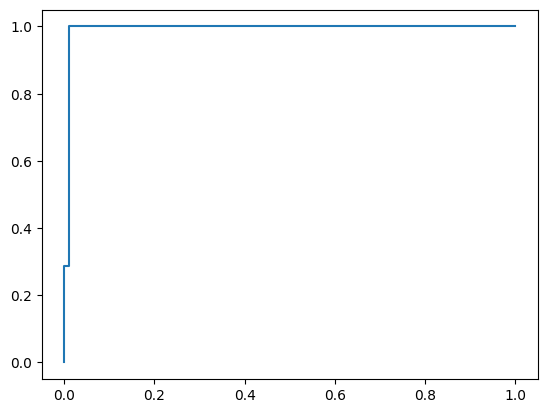

In [46]:
# roc-auc curve
y_predict_probab4 = gs4.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
fpr, tpr,thresholds=roc_curve(y_test,y_predict_probab4)

## plot roc curve
plt.plot(fpr,tpr)

### Model export

In [47]:
import pickle
model_file= open('recession_model.pk', 'wb')
pickle.dump(gs4, model_file) #this contains the model
model_file.close

<function BufferedWriter.close>

In [48]:
test_sample = [[94.4,8.9,13.00,95.5,0.15234,1.666,105,30,99,1.5]]
print(gs4.predict(test_sample))

[0]


In [ ]:
import pickle

# create an empty binary file
model_file = open('recession_model.pk', 'wb')

# dump the model into the file
pickle.dump(gs4, )

# Save the model
joblib.dump(gs4, 'project_model_joblib.pkl') 


In [ ]:
!pip show scikit-learn